https://habr.com/post/331382/

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

Using TensorFlow backend.


In [22]:
print(plt.imshow.__doc__)

Display an image on the axes.

Parameters
----------
X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
    Display the image in `X` to current axes.  `X` may be an
    array or a PIL image. If `X` is an array, it
    can have the following shapes and types:

    - MxN -- values to be mapped (float or int)
    - MxNx3 -- RGB (float or uint8)
    - MxNx4 -- RGBA (float or uint8)

    MxN arrays are mapped to colors based on the `norm` (mapping
    scalar to scalar) and the `cmap` (mapping the normed scalar to
    a color).

    Elements of RGB and RGBA arrays represent pixels of an MxN image.
    All values should be in the range [0 .. 1] for floats or
    [0 .. 255] for integers.  Out-of-range values will be clipped to
    these bounds.

cmap : `~matplotlib.colors.Colormap`, optional, default: None
    If None, default to rc `image.cmap` value. `cmap` is ignored
    if `X` is 3-D, directly specifying RGB(A) values.

aspect : ['auto' | 'equal' | scalar], optional, default: None
    

In [44]:
import matplotlib.pyplot as plt
import numpy as np
# print(dir(plt))
im = np.array(x_train[0])
print(x_train[4][1][4])
print(im[0][0])
# print(dir(im))
# print(im.resize((28,28)))
# plt.imshow(im)

[0.]
[0.]


In [13]:
print(Model.__doc__)

The `Model` class adds training & evaluation routines to a `Network`.
    


In [5]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [14]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 49)                38465     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [45]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                #validation_split=0.1,
                validation_data=(x_test, x_test),
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0869 - acc: 0.8147 - val_loss: 0.0846 - val_acc: 0.8138
Epoch 2/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0846 - acc: 0.8148 - val_loss: 0.0829 - val_acc: 0.8139
Epoch 3/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.0830 - acc: 0.8149 - val_loss: 0.0815 - val_acc: 0.8140
Epoch 4/5
41216/60000 [===================>..........] - ETA: 0s - loss: 0.0820 - acc: 0.8153

KeyboardInterrupt: 

In [46]:
%matplotlib inline
# import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [50]:
n = 10

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

array([ 4.935367 ,  1.1274712,  4.5210066,  1.7796859,  4.7858877,
        1.4821911,  8.693393 ,  3.1142232, 16.719498 ,  6.8443074,
        3.4313302,  5.5774393,  3.432063 ,  5.666904 ,  6.4113193,
        6.132977 ,  0.39527  ,  3.8064172, 12.560589 ,  6.90108  ,
        3.1047058,  3.7530074,  2.1395395, 10.325581 ,  6.4896183,
        4.337867 ,  2.6549282,  4.899153 ,  5.3323073,  3.876161 ,
        1.5370029,  6.2583914,  8.536568 ,  1.944403 ,  7.0022345,
        5.0828414,  3.2018335, 10.781203 ,  5.0998783,  4.9014406,
        2.3425868,  5.212342 ,  5.3781214,  6.3632274,  6.0192175,
        0.4928349,  3.6471229,  5.3243513,  8.191026 ], dtype=float32)

TypeError: Invalid dimensions for image data

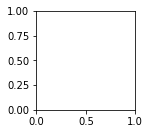

In [71]:
noise_vec = np.random.random((2,49))
decoded_noise = decoder.predict(noise_vec, batch_size=1)

plot_digits(imgs[:1], decoded_noise)

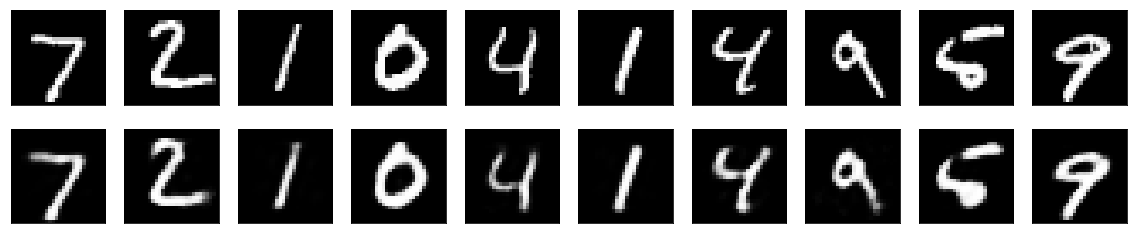

In [69]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

# Go Deeper

In [9]:
def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
d_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 49)                134750    
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         135485    
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________


In [11]:
d_autoencoder.fit(x_train, x_train,
                  epochs=100,
                  batch_size=256,
                  shuffle=True,
                  verbose=1,
                  validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.2215 - acc: 0.7895 - val_loss: 0.1487 - val_acc: 0.8041
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1333 - acc: 0.8084 - val_loss: 0.1195 - val_acc: 0.8096
Epoch 3/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1148 - acc: 0.8113 - val_loss: 0.1087 - val_acc: 0.8111
Epoch 4/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1065 - acc: 0.8125 - val_loss: 0.1023 - val_acc: 0.8121
Epoch 5/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1014 - acc: 0.8131 - val_loss: 0.0979 - val_acc: 0.8124
Epoch 6/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.0976 - acc: 0.8135 - val_loss: 0.0950 - val_acc: 0.8129
Epoch 7/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.0949 - acc: 0.8138 - val_loss: 0.0924 - 

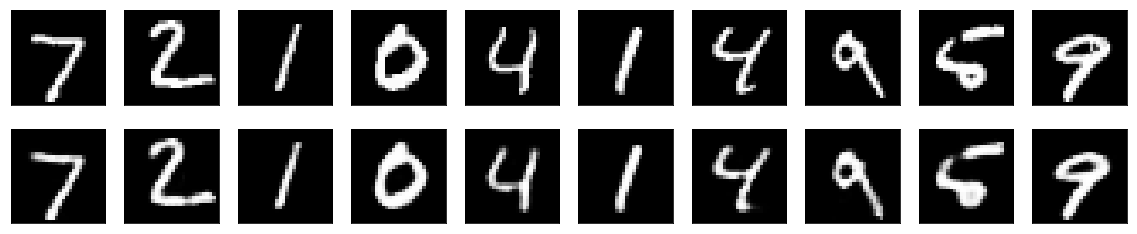

In [12]:
n = 10

imgs = x_test[:n]
encoded_imgs = d_encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

In [13]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def create_deep_conv_ae():
    input_img = Input(shape=(28, 28, 1))

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x)

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1))
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)

    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

c_autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 7, 7, 1)           24385     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         24385     
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
c_autoencoder.fit(x_train, x_train,
                epochs=64,
                batch_size=256,                                        
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/64
60000/60000 [==============================] - 1095s 18ms/step - loss: 0.1722 - val_loss: 0.1015
Epoch 2/64
  256/60000 [..............................] - ETA: 17:51 - loss: 0.1017

KeyboardInterrupt: 

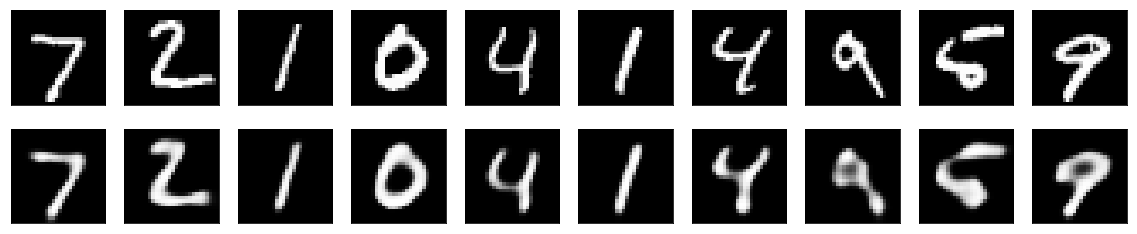

In [15]:
n = 10

imgs = x_test[:n]
encoded_imgs = c_encoder.predict(imgs, batch_size=n)
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

In [16]:
import keras.backend as K
from keras.layers import Lambda

batch_size = 16

def create_denoising_model(autoencoder):
    def add_noise(x):
        noise_factor = 0.5
        x = x + K.random_normal(x.get_shape(), 0.5, noise_factor)
        x = K.clip(x, 0., 1.)
        return x

    input_img  = Input(batch_shape=(batch_size, 28, 28, 1))
    noised_img = Lambda(add_noise)(input_img)

    noiser = Model(input_img, noised_img, name="noiser")
    denoiser_model = Model(input_img, autoencoder(noiser(input_img)), name="denoiser")
    return noiser, denoiser_model


noiser, denoiser_model = create_denoising_model(autoencoder)
denoiser_model.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
denoiser_model.fit(x_train, x_train,
                   epochs=,
                   batch_size=batch_size,
                   shuffle=True,
                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 287us/step - loss: 0.1305 - val_loss: 0.1285
Epoch 2/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.1299 - val_loss: 0.1288
Epoch 3/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.1293 - val_loss: 0.1318
Epoch 4/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.1291 - val_loss: 0.1268
Epoch 5/5
60000/60000 [==============================] - 17s 281us/step - loss: 0.1287 - val_loss: 0.1267


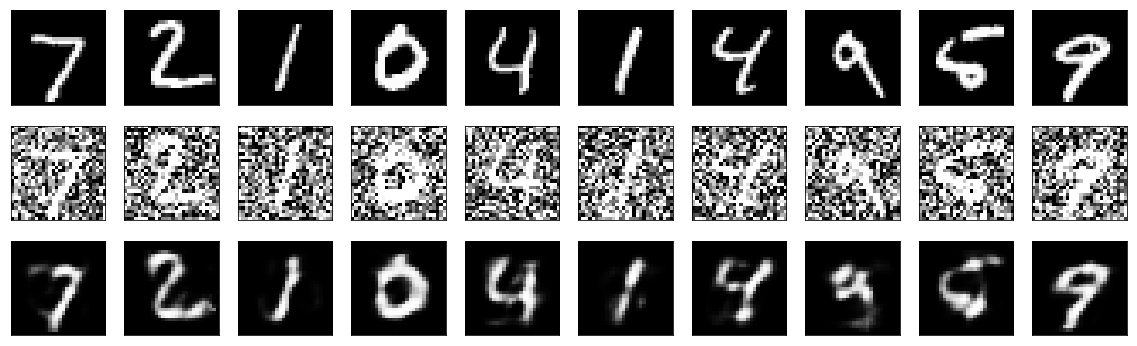

In [23]:
n = 10

imgs = x_test[:batch_size]
noised_imgs = noiser.predict(imgs, batch_size=batch_size)
encoded_imgs = encoder.predict(noised_imgs[:n],  batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs[:n], batch_size=n)

plot_digits(imgs[:n], noised_imgs, decoded_imgs)

In [24]:
from keras.regularizers import L1L2

def create_sparse_ae():
    encoding_dim = 16
    lambda_l1 = 0.00001
    
    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear', activity_regularizer=L1L2(lambda_l1))(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

s_encoder, s_decoder, s_autoencoder = create_sparse_ae()
s_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
s_autoencoder.fit(x_train, x_train,
                epochs=400,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/400
60000/60000 [==============================] - 4s 67us/step - loss: 0.3242 - val_loss: 0.2532
Epoch 2/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.2379 - val_loss: 0.2182
Epoch 3/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1998 - val_loss: 0.1868
Epoch 4/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1828 - val_loss: 0.1757
Epoch 5/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1707 - val_loss: 0.1650
Epoch 6/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1639 - val_loss: 0.1608
Epoch 7/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1599 - val_loss: 0.1566
Epoch 8/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1558 - val_loss: 0.1526
Epoch 9/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1521 - val_loss: 0.1

60000/60000 [==============================] - 3s 58us/step - loss: 0.1085 - val_loss: 0.1077
Epoch 154/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1084 - val_loss: 0.1075
Epoch 155/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1084 - val_loss: 0.1077
Epoch 156/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1084 - val_loss: 0.1071
Epoch 157/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1084 - val_loss: 0.1072
Epoch 158/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1084 - val_loss: 0.1073
Epoch 159/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1084 - val_loss: 0.1073
Epoch 160/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1084 - val_loss: 0.1073
Epoch 161/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1083 - val_loss: 0.1071
Epoch 162/400
60000/60000 [===============

Epoch 229/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1072 - val_loss: 0.1065
Epoch 230/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1071 - val_loss: 0.1065
Epoch 231/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1071 - val_loss: 0.1062
Epoch 232/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1071 - val_loss: 0.1064
Epoch 233/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1071 - val_loss: 0.1064
Epoch 234/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1071 - val_loss: 0.1061
Epoch 235/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1071 - val_loss: 0.1060
Epoch 236/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1070 - val_loss: 0.1068
Epoch 237/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1071 - val_loss: 0.1067
Epoch 238/400
60000/60000 [=

Epoch 305/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1063 - val_loss: 0.1059
Epoch 306/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1064 - val_loss: 0.1061
Epoch 307/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1064 - val_loss: 0.1056
Epoch 308/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1064 - val_loss: 0.1058
Epoch 309/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1064 - val_loss: 0.1059
Epoch 310/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1064 - val_loss: 0.1055
Epoch 311/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1064 - val_loss: 0.1060
Epoch 312/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1064 - val_loss: 0.1057
Epoch 313/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1063 - val_loss: 0.1055
Epoch 314/400
60000/60000 [=

Epoch 381/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1058 - val_loss: 0.1054
Epoch 382/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1059 - val_loss: 0.1053
Epoch 383/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1059 - val_loss: 0.1057
Epoch 384/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1058 - val_loss: 0.1051
Epoch 385/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1058 - val_loss: 0.1056
Epoch 386/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1058 - val_loss: 0.1051
Epoch 387/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1057 - val_loss: 0.1057
Epoch 388/400
60000/60000 [==============================] - 3s 57us/step - loss: 0.1058 - val_loss: 0.1053
Epoch 389/400
60000/60000 [==============================] - 3s 58us/step - loss: 0.1058 - val_loss: 0.1050
Epoch 390/400
60000/60000 [=

In [26]:
n = 10

imgs = x_test[:n]
encoded_imgs = s_encoder.predict(imgs, batch_size=n)
encoded_imgs[1]

array([-0.01140716, -0.00685825,  0.00802971, -0.00467149,  0.01904835,
        0.021827  ,  0.10502964, -0.01931561,  0.03334279,  0.00636835,
       -0.02132713, -0.03849851, -0.03247833, -0.05501447,  0.0156196 ,
       -0.02472747], dtype=float32)

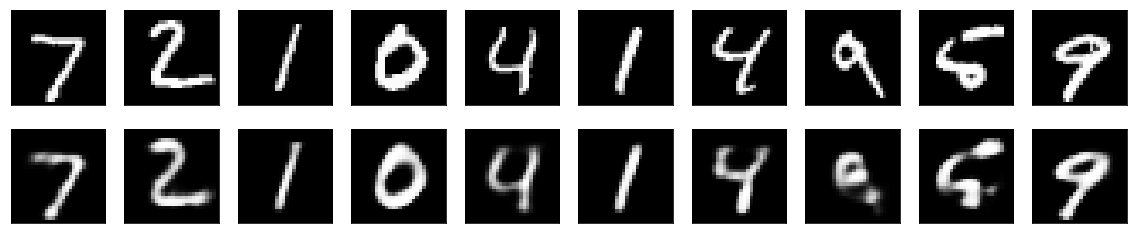

In [27]:
decoded_imgs = s_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

In [49]:
len(encoded_imgs.max(axis=0))

16

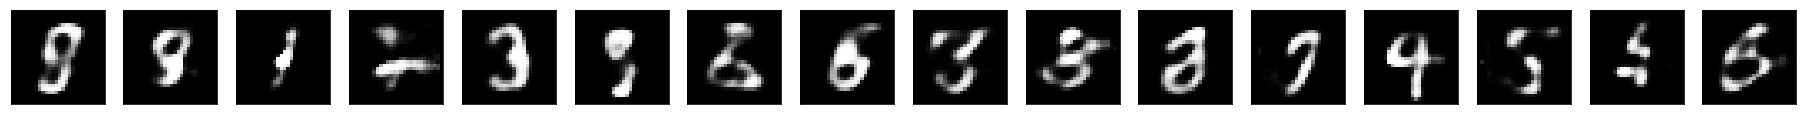

In [53]:
# for understanding the decoder we average all encoded test data and put in 16(this is the size
# of encoder output layer) by descending in diagonal the max of encoded images values - to fire one
# by one the encoding dimensions and see what they stands for

# if we pass just averaged we get decoded 8...

imgs = x_test
encoded_imgs = s_encoder.predict(imgs, batch_size=16)
codes = np.vstack([encoded_imgs.mean(axis=0)]*16)
np.fill_diagonal(codes, encoded_imgs.max(axis=0))

decoded_features = s_decoder.predict(codes, batch_size=16)
plot_digits(decoded_features)

In [37]:
np.fill_diagonal(codes, 999)

In [38]:
codes

array([[ 9.9900000e+02, -1.1772240e-03,  4.3631069e-04,  4.0492648e-04,
         1.2352107e-03,  2.4676828e-03, -2.5511857e-03, -3.9365163e-04,
        -2.4242317e-03, -1.8172283e-03,  2.9280627e-04, -3.4447231e-03,
         7.8001465e-03,  1.8724791e-03,  2.8474166e-03,  2.1105304e-03],
       [-2.9285036e-03,  9.9900000e+02,  4.3631069e-04,  4.0492648e-04,
         1.2352107e-03,  2.4676828e-03, -2.5511857e-03, -3.9365163e-04,
        -2.4242317e-03, -1.8172283e-03,  2.9280627e-04, -3.4447231e-03,
         7.8001465e-03,  1.8724791e-03,  2.8474166e-03,  2.1105304e-03],
       [-2.9285036e-03, -1.1772240e-03,  9.9900000e+02,  4.0492648e-04,
         1.2352107e-03,  2.4676828e-03, -2.5511857e-03, -3.9365163e-04,
        -2.4242317e-03, -1.8172283e-03,  2.9280627e-04, -3.4447231e-03,
         7.8001465e-03,  1.8724791e-03,  2.8474166e-03,  2.1105304e-03],
       [-2.9285036e-03, -1.1772240e-03,  4.3631069e-04,  9.9900000e+02,
         1.2352107e-03,  2.4676828e-03, -2.5511857e-03, -3.93

In [29]:
encoded_imgs[0]

array([-0.02737584, -0.02466949, -0.02535602,  0.0217512 ,  0.01328904,
        0.02588357, -0.05673403, -0.04284179, -0.00154354, -0.02205921,
       -0.02785674,  0.0538547 ,  0.0026113 ,  0.00396515, -0.04224446,
       -0.01732188], dtype=float32)

In [35]:
np.vstack([1,2,3]*3)

array([[1],
       [2],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [3]])

In [32]:
[encoded_imgs.mean(axis=0)]*10

[array([-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0.00211053], dtype=float32),
 array([-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0.00211053], dtype=float32),
 array([-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0.00211053], dtype=float32),
 array([-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0

In [36]:
np.vstack([encoded_imgs.mean(axis=0)]*10)

array([[-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0.00211053],
       [-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0.00211053],
       [-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0.00211053],
       [-0.0029285 , -0.00117722,  0.00043631,  0.00040493,  0.00123521,
         0.00246768, -0.00255119, -0.00039365, -0.00242423, -0.00181723,
         0.00029281, -0.00344472,  0.00780015,  0.00187248,  0.00284742,
         0.00211053],
       [-0.0029285 , -0.00117722,  0